In [2]:
using PyPlot

In [39]:
function getA(lam, n, dt)
    out = zeros(n, n)
    for i = 1:n
        out[i, i] = 1 - 2*lam + dt
        for j = 1:n
            if i == j-1 || i == j+1
                out[i, j] = lam
            end
        end
    end
    out[1,n-1] = lam
    out[n,2] = lam
    return out
end

function ForwardDiff(s, l, a, dt, dx, t, f)
    m = round(Int, (l-s)/dx) + 1
    u = zeros(m)
    x = s:dx:l
    lam = a^2*dt/(dx^2)
    A = getA(lam, m, dt)
    for i = 1:m
        u[i] = f(x[i])
    end
    for i = 1:t/dt
        u = A*u - dt*(u.^2)
    end
    return x, u
end;

In [40]:
a = 1; # alpha
s = -50; # start point for x values
l = 50; # end point for x values
dx = 0.2; # l/m - step size, ∆x
dt = 0.01; # time step size, ∆t

0.01

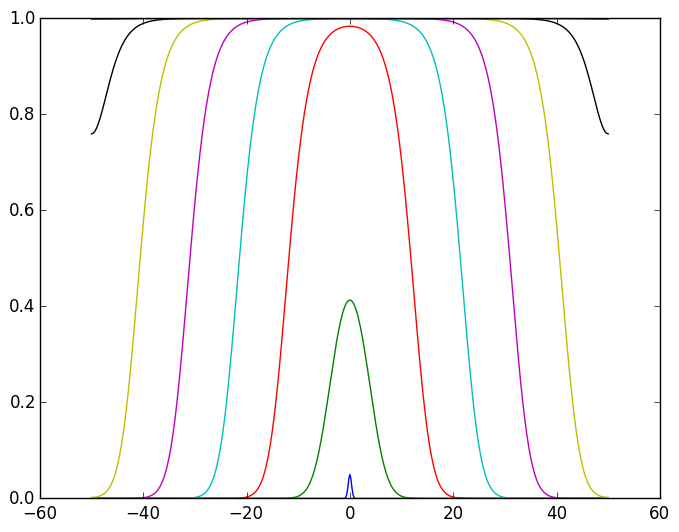

In [41]:
f = x -> 0.05*exp(-5*x^2); # u(x, 0) - initial condition
for t = 0:5:40
    x, u = ForwardDiff(s, l, a, dt, dx, t, f);
    plot(x, u);
end;

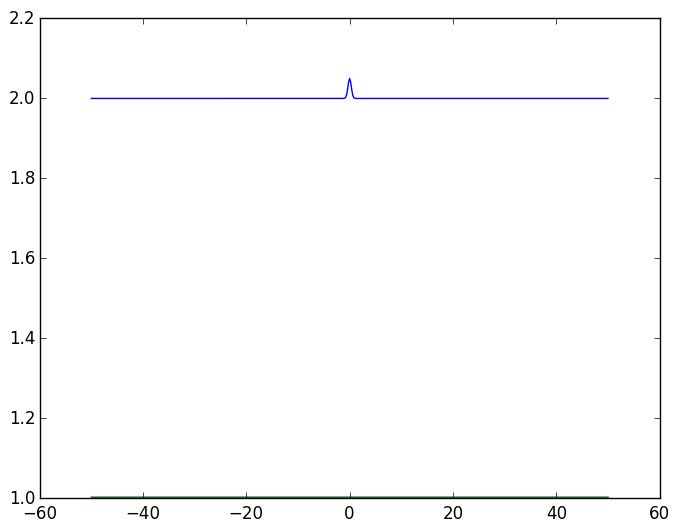

In [42]:
f = x -> 2 + 0.05*exp(-5*x^2); # u(x, 0) - initial condition
for t = 0:5:40
    x, u = ForwardDiff(s, l, a, dt, dx, t, f)
    plot(x, u);
end;

## Observations

The second one is always the same!